<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/Lakhan_U3_MH1_CNN_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains ~22k images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains ~2k images, named according to a numeric id.

## Grading = 10 Marks

## Setup Steps

In [1]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="U3_MH1_CNN_with_Pytorch" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data_B17.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data_B17.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

## **Stage 1:** Define Transformations and import data

### 1 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/vision/stable/transforms.html)

In [3]:
image_size = (128,128)

# YOUR CODE HERE for defining Transformation for an image
transformations = transforms.Compose([
        transforms.Resize(image_size),  # Resize image to 128x128
        transforms.Grayscale(),         # Convert image to Grayscale
        transforms.ToTensor(),          # Convert image to a tensor (scales values to [0,1])
        transforms.Normalize(mean=[0.5], std=[0.5]) # Normalize with mean 0.5 and std 0.5
        ])

### 1 Mark -> Load the dataset with the defined transformations

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [4]:
batch_size = 100

train_dataset = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)
#test_dataset = datasets.ImageFolder('/content/Cat_Dog_data/test', transform=transformations)

# YOUR CODE HERE for the DataLoader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


In [5]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


### 1 Marks -> Plot the 5 images of Cats and 5 images of Dogs

['cat', 'dog'] 2


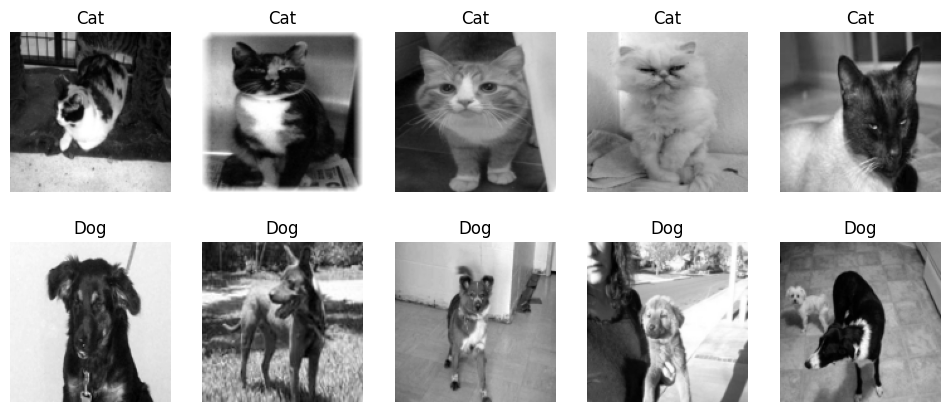

In [16]:
# YOUR CODE HERE for plotting the images
import numpy as np
class_names = train_dataset.classes
print(class_names, len(class_names))

# define a transform to convert a tensor to PIL image
#transform = transforms.ToPILImage()


#Function to show images
def imshow(img, ax):
  img = img.numpy().transpose((1,2,0)) # convert from Tensor to numpy #
  #img = np.clip(img, 0, 1) # clip to valid range
  #ax.imshow(np.squeeze(img), cmap='gray')
  ax.imshow(img, cmap='gray')


#collect 5 images of cats and dogs
cat_images = []
dog_images = []

for images, labels in train_loader:
  for img, label in zip(images, labels):
    if label == 0 and len(cat_images) < 5: # cat class is 0
      cat_images.append(img)
    elif label == 1 and len(dog_images) < 5: # dog label is 1
      dog_images.append(img)
    if len(cat_images) == 5 and len(dog_images) == 5:
      break
  if (len(cat_images) == 5 and len(dog_images) == 5):
    break

# plot the images
fig, axes = plt.subplots(2,5, figsize =(12,5))

for i in range(5):
  imshow(cat_images[i], axes[0, i])
  axes[0,i].set_title("Cat")
  axes[0,i].axis("off")


for i in range(5):
  imshow(dog_images[i], axes[1, i])
  axes[1,i].set_title("Dog")
  axes[1,i].axis("off")

plt.show()

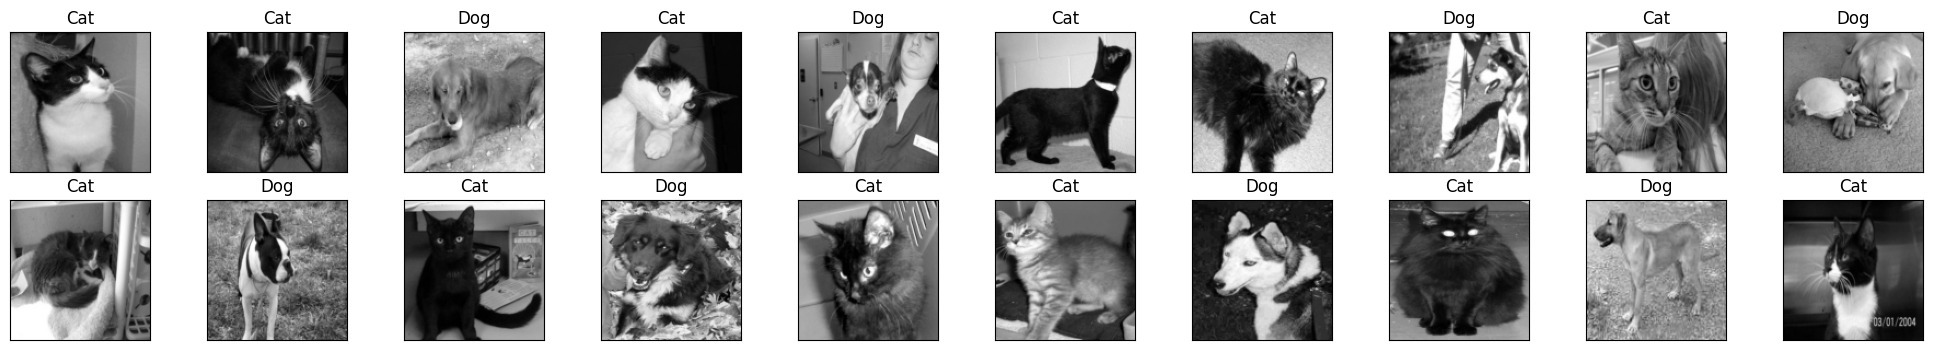

In [12]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
labels_map = {0 : 'Cat', 1 : 'Dog'};
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(labels_map[int(str(labels[idx].numpy()))])

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)



### 3 Marks -> Create CNN Model


In [32]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Sample Convolution Layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2), # output size of the first convolutional layer is 16*128*128
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4) # output = (16, 32, 32)
            # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32 (Img size - K/Stride + 1)
        )

        # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use at least 3 convolutional layers for better performance)

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride =1, padding =2), # output = (32, 32, 32)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride =4) # output = (32, 8, 8)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride =1, padding =2), # output = (64, 8, 8)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride =4) # output = (64, 2, 2)-  (100, 64, 2, 2)
        )

        # self.layer4 = nn.Sequential(
        #     nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride =1, padding =2), # output = (64, 8, 8)
        #     nn.BatchNorm2d(128),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=4, stride =4) # output = (128, 2, 2)
        # )



        # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax
        self.fc1 = nn.Linear(64 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, len(class_names))
        self.log_softmax = nn.LogSoftmax(dim=1) # Logsoft max over classes

    def forward(self, x):
        # Convolution Layer 1 and Maxpool

        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector
        #print(out.size)
        out = out.view(out.size(0), -1) # Flatten before Fc layer out = out.view(-1, 64*2*2) out = out.view(-1, 64*2*2)

        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer
        # Linear layers with RELU activation
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.log_softmax(self.fc4(out))
        return out




### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [33]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [34]:
model = CNNModel()
model = model.to(device)
#print(model)

#!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(1,128,128), batch_size=1)

# YOUR CODE HERE : Explore and declare loss function
criterion = nn.CrossEntropyLoss()

# YOUR CODE HERE : Explore on the optimizer and define with the learning rate
optimizer = optim.Adam(model.parameters(), lr= 0.001)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 128, 128]             416
       BatchNorm2d-2          [1, 16, 128, 128]              32
              ReLU-3          [1, 16, 128, 128]               0
         MaxPool2d-4            [1, 16, 32, 32]               0
            Conv2d-5            [1, 32, 32, 32]          12,832
       BatchNorm2d-6            [1, 32, 32, 32]              64
              ReLU-7            [1, 32, 32, 32]               0
         MaxPool2d-8              [1, 32, 8, 8]               0
            Conv2d-9              [1, 64, 8, 8]          51,264
      BatchNorm2d-10              [1, 64, 8, 8]             128
             ReLU-11              [1, 64, 8, 8]               0
        MaxPool2d-12              [1, 64, 2, 2]               0
           Linear-13                   [1, 128]          32,896
           Linear-14                   

## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

### Expected training accuracy is above 90%

### 2 Marks -> Iterate over images in the train_loader and perform the following steps.

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)

In [35]:
# YOUR CODE HERE. This will take time

# Record loss and accuracy of the train dataset
epoch = 10

model.train()
train_losses, train_accuracy = [], []

# Loop for no of epochs

for i in range(epoch):
  train_loss = 0
  correct = 0

  #Iterate through all the batches in each epoch
  for images, labels in train_loader:

    # Convert to GPU for faster execution
    images = images.to(device)
    labels = labels.to(device)

    #Zero the parameter gradients
    optimizer.zero_grad()

    #passing the data to model
    outputs = model(images)

    #calculate loss
    loss = criterion(outputs, labels)
    train_loss += loss.item()

    #Performing backward pass
    loss.backward()

    #optimiser  Update the weights
    optimizer.step()

    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()

  #accuracy calculation
  train_losses.append(train_loss/len(train_dataset))
  train_accuracy.append(100 * correct/len(train_dataset))

  print("Epoch: {}, Train Loss: {:.6f}, Train accuracy: {:.2f}".format(i+1, train_losses[-1], train_accuracy[-1]))




Epoch: 1, Train Loss: 0.004946, Train accuracy: 75.55
Epoch: 2, Train Loss: 0.003620, Train accuracy: 83.99
Epoch: 3, Train Loss: 0.002984, Train accuracy: 87.13
Epoch: 4, Train Loss: 0.002560, Train accuracy: 89.39
Epoch: 5, Train Loss: 0.002181, Train accuracy: 90.85
Epoch: 6, Train Loss: 0.001746, Train accuracy: 92.95
Epoch: 7, Train Loss: 0.001470, Train accuracy: 94.20
Epoch: 8, Train Loss: 0.001184, Train accuracy: 95.41
Epoch: 9, Train Loss: 0.000993, Train accuracy: 96.17
Epoch: 10, Train Loss: 0.000832, Train accuracy: 96.87


## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 1 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count of the correct labels

5. Calculate the accuracy based on the count of correct labels

In [38]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)

# YOUR CODE HERE for the DataLoader
val_loader = torch.utils.data.DataLoader(dataset=val_set,
                                          batch_size=batch_size,
                                          shuffle=False)


In [40]:
# YOUR CODE HERE for calculating the accuracy
model.eval()

test_accuracy = 0

# torch.no_grad():  # Disable gradient calculations
# torch.inference_mode():  More powerfull - reduces memory usage and disables gradient computation
with torch.inference_mode():

  # iterate through images
  for images, labels in val_loader:

    images = images.to(device)
    labels = labels.to(device)

    #output
    outputs = model(images)

  #accuracy
    _, predicted = torch.max(outputs, 1)
    test_accuracy += (predicted == labels).sum().item()

accuracy = 100 * test_accuracy/len(val_set)
print("Accuracy for validation test is", accuracy)

Accuracy for validation test is 90.02444987775061
